In [ ]:
from google.colab import files
uploaded = files.upload()
#this cell is to upload the file to google collab environment. ignore if running locally

Saving BankChurners.csv to BankChurners.csv


In [ ]:
import io
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
df = pd.read_csv(io.BytesIO(uploaded['BankChurners.csv'])) #if running locally, comment out this line and uncomment the next
#df=pd.read_csv('BankChurners.csv')
df.drop(df.columns[[21, 22]], axis = 1, inplace = True) # drop naives_bayes columns
df.shape

(10127, 21)

In [ ]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
# Less text on income bins
df['Income_Category'] = df['Income_Category'].replace('Less than $40K', '< 40K')
df['Income_Category'] = df['Income_Category'].replace('$40K - $60K', '40K - 60K')
df['Income_Category'] = df['Income_Category'].replace('$60K - $80K', '60K - 80K')
df['Income_Category'] = df['Income_Category'].replace('$80K - $120K', '80K - 120K')
df['Income_Category'] = df['Income_Category'].replace('$120K +', '>120K')

# Setup target variable
df['churn'] = df['Attrition_Flag'].replace('Existing Customer',0).replace('Attrited Customer',1)
df.drop('Attrition_Flag',axis=1,inplace=True)

# Check for Nulls
df.isna().any()

CLIENTNUM                   False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
churn                       False
dtype: bool

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# create a label encoder for columns with <2 unique values
le = LabelEncoder()
count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])



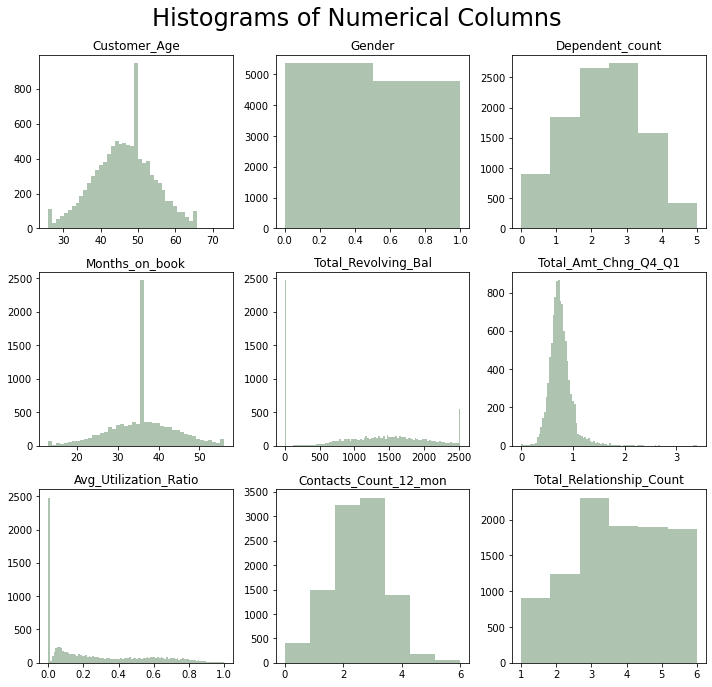

In [ ]:
EDA_df = df[['Customer_Age',
             'Gender',
             'Dependent_count',
             'Months_on_book',
             'Total_Revolving_Bal',
             'Total_Amt_Chng_Q4_Q1',
             'Avg_Utilization_Ratio',
             'Contacts_Count_12_mon',
            'Total_Relationship_Count']]


fig = plt.figure(figsize=(10, 10))
plt.suptitle('Histograms of Numerical Columns\n',
             horizontalalignment="center",
             fontstyle = "normal",
             fontsize = 24,
             fontfamily = "sans-serif")

for i in range(EDA_df.shape[1]):
    plt.subplot(3, 3, i + 1)
    f = plt.gca()
    f.set_title(EDA_df.columns.values[i])
    vals = np.size(EDA_df.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(EDA_df.iloc[:, i],
         bins=vals,
         color = '#AEC3B0')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

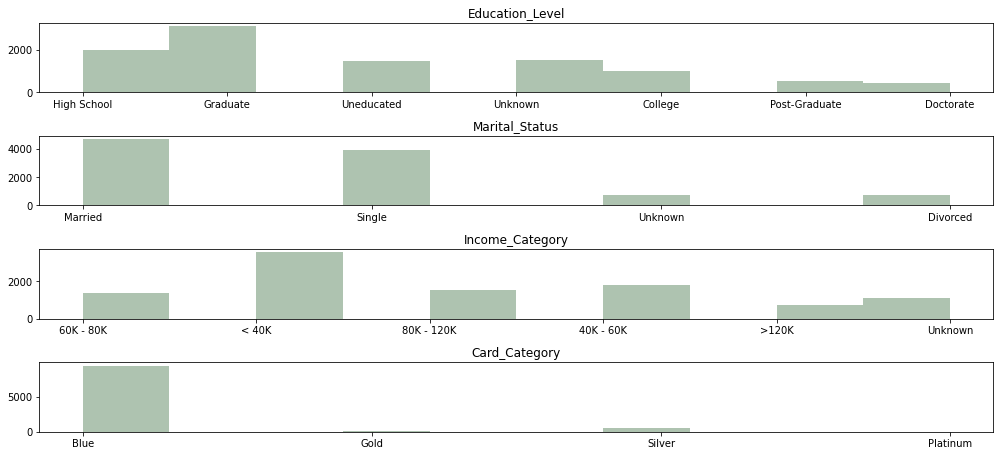

In [ ]:
categories = ['Education_Level',
              'Marital_Status',
              'Income_Category',
              'Card_Category']

fig, ax = plt.subplots(4, figsize=(14, 7))

i = 0
for cat in categories:
    ax[i].hist(df[cat],color = '#AEC3B0')
    ax[i].set_title(cat)
    i += 1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

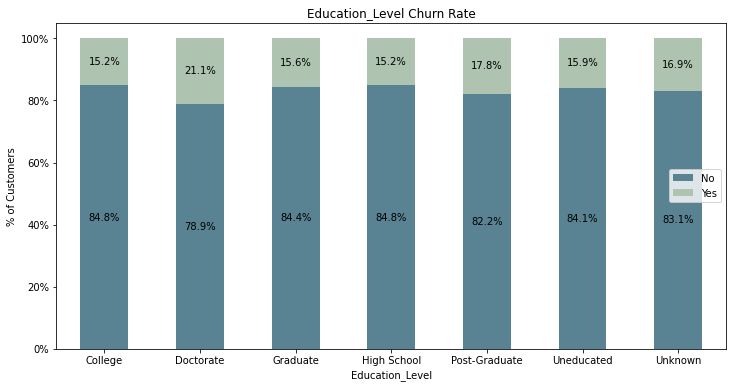

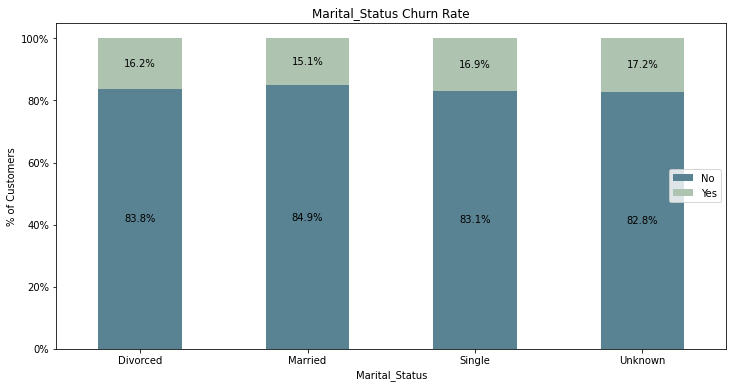

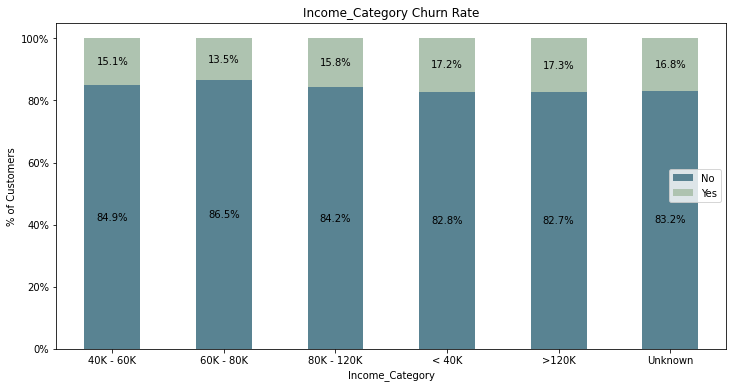

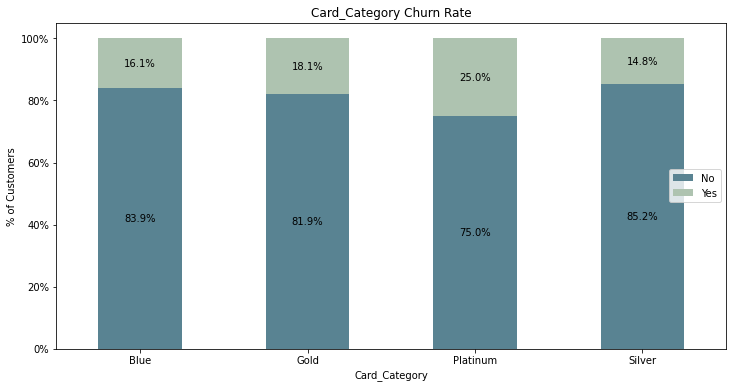

In [ ]:
# Visualise churn rate by categories
categories = ['Education_Level','Marital_Status','Income_Category','Card_Category']

for cat in categories:
    temp_churn = df.groupby([cat,'churn']).size().unstack()
    temp_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
    colors  = ['#598392','#AEC3B0']

    ax = (temp_churn.T*100.0 / temp_churn.T.sum()).T.plot(
        kind='bar',
        figsize = (12,6),
        width = 0.5,
        stacked = True,
        color = colors)

    plt.ylabel('% of Customers')
    plt.xlabel(cat)
    plt.title(cat + ' Churn Rate')

    plt.legend(loc='right', fontsize = "medium")
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.yticks(rotation=0, horizontalalignment="right")
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.text(x+width/2,
                y+height/2,
                '{:.1f}%'.format(height),
                horizontalalignment='center',
                verticalalignment='center')
    ax.autoscale(enable=False, axis='both', tight=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
# One-hot encode the data
ID = df["CLIENTNUM"]
#df = df.drop(columns="CLIENTNUM")
df = pd.get_dummies(df)
df = pd.concat([df, ID], axis = 1)

# Split for training and test data
response = df['churn']
#df = df.drop(columns="churn")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, response, stratify=response, random_state=43, test_size = 0.2)





In [ ]:


train_identity = X_train['CLIENTNUM']
X_train = X_train.drop(columns = ['CLIENTNUM'])
test_identity = X_test['CLIENTNUM']
X_test = X_test.drop(columns = ['CLIENTNUM'])



In [ ]:
X_test = X_test.drop(columns = ['churn'])
X_train = X_train.drop(columns = ['churn'])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))

acc_results = []
names = []
col = ['Algorithm','Accuracy']
model_results = pd.DataFrame(columns=col)
i = 0
for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc_score=accuracy_score(pred,y_test)
    acc_results.append(acc_score)
    names.append(name)
    model_results.loc[i]=[name,acc_score]
    i += 1
print("evaluation finished")

evaluation finished


In [ ]:
print(model_results)

                  Algorithm  Accuracy
0       Logistic Regression  0.851431
1                       SVC  0.888944
2                       KNN  0.887957
3               Gaussian NB  0.898815
4  Decision Tree Classifier  0.948174


In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values

In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))

acc_results = []
names = []
col = ['Algorithm','Accuracy']
model_results = pd.DataFrame(columns=col)
i = 0
for name, model in models:
    model.fit(X_train2, y_train)
    pred = model.predict(X_test2)
    acc_score=accuracy_score(pred,y_test)
    acc_results.append(acc_score)
    names.append(name)
    model_results.loc[i]=[name,acc_score]
    i += 1
print("evaluation finished")

evaluation finished


In [ ]:
print(model_results)

                  Algorithm  Accuracy
0       Logistic Regression  0.853406
1                       SVC  0.905726
2                       KNN  0.868213
3               Gaussian NB  0.880059
4  Decision Tree Classifier  0.948667
